# Decision Tree Regression

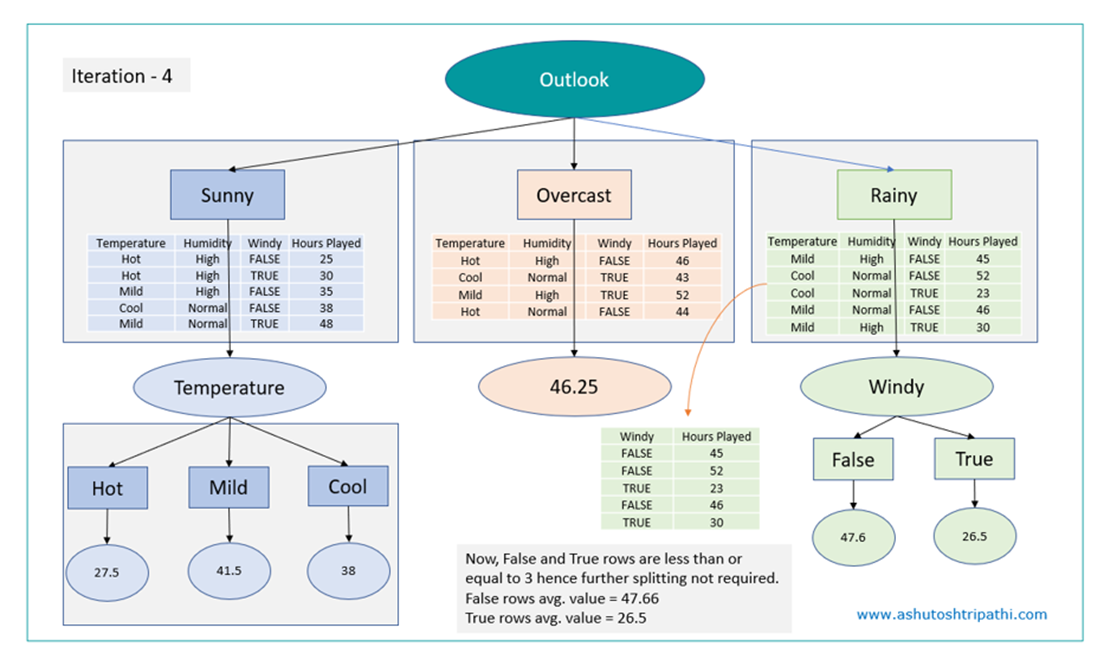

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

### Seprate X and Y

In [6]:
X = df.drop(columns=['PROFIT'])
Y = df[['PROFIT']]

In [7]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Create a preprocessing pipeline for X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['STATE']

In [11]:
con

['RND', 'ADMIN', 'MKT']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('OHE', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [18]:
X_pre = pre.fit_transform(X)
X_pre[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  0.        ,  0.        ,
         1.        ],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ,  1.        ,
         0.        ]])

In [19]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [20]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


### Train Test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [22]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
12,0.443260,0.215449,0.320617,0.0,1.0,0.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0
37,-0.652532,-2.525994,-0.115608,1.0,0.0,0.0
8,1.030369,0.986952,0.830887,0.0,0.0,1.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0


In [23]:
ytrain.head()

,PROFIT
12,141585.52
4,166187.94
37,89949.14
8,152211.77
3,182901.99


In [24]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
13,0.402078,0.510179,0.343957,1.0,0.0,0.0
39,-0.773820,-1.383122,-0.297583,1.0,0.0,0.0
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
45,-1.600350,0.101254,-1.727400,0.0,0.0,1.0
17,0.460720,0.855666,0.591017,0.0,0.0,1.0


In [25]:
ytest.head()

,PROFIT
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


In [26]:
xtrain.shape

(40, 6)

In [27]:
xtest.shape

(10, 6)

### Create a decision tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=1, min_samples_split=11, min_samples_leaf=5, criterion='squared_error')
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=11)

In [29]:
dtr.score(xtrain, ytrain)

0.6656844887926776

In [30]:
dtr.score(xtest, ytest)

0.14190648504101122

### Apply GridsearchCV for hyperparameter tuning

In [31]:
params = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split':[5, 6, 7, 8, 9],
          'min_samples_leaf':[4, 5, 6, 7, 8],
          'criterion':['squared_error', 'absolute_error']}

In [32]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [33]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [34]:
gscv.best_score_

-183118758.35868686

In [35]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=5)

### Evaluate above model

In [36]:
best_dtr.score(xtrain, ytrain)

0.9603095854013909

In [37]:
best_dtr.score(xtest, ytest)

0.865968654363382

In [38]:
from PM7 import evaluate_model

In [39]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_dtr)

Training Results : 
MSE : 68325378.97
RMSE: 8265.92
MAE : 5700.42
R2  : 0.9603


Testing Results : 
MSE : 108537521.32
RMSE: 10418.13
MAE : 8653.18
R2  : 0.8660
